In [48]:
!pip install d2l


In [23]:
!pip install -q git+https://github.com/tensorflow/examples.git

In [11]:
!pip install git+https://github.com/d2l-ai/d2l-en --user


  Cloning https://github.com/d2l-ai/d2l-en to c:\users\asus\appdata\local\temp\pip-req-build-c9q2gjm_
  Resolved https://github.com/d2l-ai/d2l-en to commit 1ca368db8523672f52c4e997b1e330aee013f1ce
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/d2l-ai/d2l-en 'C:\Users\ASUS\AppData\Local\Temp\pip-req-build-c9q2gjm_'


  Cloning https://github.com/d2l-ai/d2l-en to c:\users\asus\appdata\local\temp\pip-req-build-dzs02ppn
  Resolved https://github.com/d2l-ai/d2l-en to commit 1ca368db8523672f52c4e997b1e330aee013f1ce
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/d2l-ai/d2l-en 'C:\Users\ASUS\AppData\Local\Temp\pip-req-build-dzs02ppn'


In [3]:
# tính đạo hàm cho hàm tổng quát
%matplotlib inline
import math
import numpy as np
from scipy import optimize


# Hàm mục tiêu (objective function) được tối ưu hóa.
def f(x):
  x = x[-1]
  return x*x + 10*math.sin(x)


# Hàm trả về đạo hàm của hàm mục tiêu tại mỗi điểm x. 
def gradf(x):
  x = x[-1]
  return np.asarray(2*x + 10*math.cos(x))

# Hàm mục tiêu tổng quát mà bạn muốn tối ưu hóa.
def function(theta):
  x = theta[-1]
  return math.log(1+ (abs(x))**(2 + math.sin(x)))
  # return x**3

# general_grad(theta, function): Hàm này tính toán đạo hàm của hàm mục tiêu tổng quát tại điểm θ
# Nó sử dụng phương pháp số để xấp xỉ đạo hàm theo từng chiều. 
# Trong trường hợp của bạn, nó sử dụng optimize.approx_fprime từ thư viện SciPy để xấp xỉ đạo hàm.
def general_grad(theta, function):
    theta = np.asarray(theta)
    if theta.ndim == 0:  # Handle the case where theta is a scalar
        theta = np.array([theta])

    eps = np.ones_like(theta) * 1e-6
    return optimize.approx_fprime(theta, function, eps)


# Mục tiêu của các hàm này là cung cấp một cách tổng quan và linh hoạt để tối ưu hóa các hàm mục tiêu khác nhau.
# Các hàm này được sử dụng trong các thuật toán tối ưu hóa như Gradient Descent và các biến thể của nó 
# (ví dụ: Gradient Descent with Momentum, Adagrad, RMSprop, Adam, ...).



In [28]:
import numpy as np
import math

class Optimizer:
    def __init__(self, list_param, learning_rate, max_epoch, gradf, function, beta1=0.9, beta2=0.99, epsilon=0.01):
        self.list_param = np.array(list_param)
        self.learning_rate = learning_rate
        self.max_epoch = max_epoch
        self.gradf = gradf
        self.function = function
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon

    def gd(self):
        param = self.list_param.copy()
        theta = [param]

        for i in range(self.max_epoch):
            param = np.add(param, -self.learning_rate * self.gradf(theta, self.function))
            theta.append(param)
            if np.linalg.norm(theta[-1] - theta[-2]) <= 1e-8:
                break

        print('gd epoch ', i, 'x: ', param)
        return theta, i
    
    def bgd(self):
        theta = [self.list_param]

        for it in range(self.max_epoch):
            gradient = self.gradf(theta[-1], self.function)
            theta_new = np.add(theta[-1], -self.learning_rate * gradient)
            theta.append(theta_new)
            if np.linalg.norm(theta[-1] - theta[-2]) <= 1e-8:
                break

        print('BGD epoch ', it, 'x: ', theta_new)
        return theta, it

    def mbgd(self, batch_size=32):
        theta = [self.list_param]

        for it in range(self.max_epoch):
            if batch_size > len(self.list_param):
                batch_size = len(self.list_param)

            indices = np.random.choice(len(self.list_param), batch_size, replace=False)
            gradient = self.gradf(self.list_param[indices], self.function)
            theta_new = np.add(theta[-1], -self.learning_rate * gradient)
            theta.append(theta_new)
            if np.linalg.norm(theta[-1] - theta[-2]) <= 1e-8:
                break

        print('MBGD epoch ', it, 'x: ', theta_new)
        return theta, it

    def sgd(self):
        theta = [self.list_param]

        for it in range(self.max_epoch):
            random_index = np.random.randint(len(self.list_param))
            gradient = self.gradf(self.list_param[random_index], self.function)
            theta_new = np.add(theta[-1], -self.learning_rate * gradient)
            theta.append(theta_new)
            if np.linalg.norm(theta[-1] - theta[-2]) <= 1e-8:
                break

        print('SGD epoch ', it, 'x: ', theta_new)
        return theta, it
    
    
    def gd_momentum(self):
        theta = [self.list_param]
        gamma = 0.9
        v_old = np.zeros_like(self.list_param)
        
        for it in range(self.max_epoch):
            v_new = gamma * v_old + self.learning_rate*self.gradf(theta[-1],self.function)
            theta_new = np.add(theta[-1], -1* v_new)
            theta.append(theta_new)
            v_old = v_new
            if np.linalg.norm(theta[-1] - theta[-2]) <= 1e-8:
                break
        
        
        print('gd_momentum epoch ', it, 'x: ', theta_new)
        return theta, it
    
    def adagrad(self):
        theta = [self.list_param]
        epsilon = 1e-8
        G = np.zeros_like(self.list_param)
        
        for it in range(self.max_epoch):
            gradient = self.gradf(theta[-1], self.function)
            G += gradient ** 2
            adjusted_lr = self.learning_rate / (np.sqrt(G) + epsilon)
            theta_new = np.add(theta[-1], -adjusted_lr * gradient)
            theta.append(theta_new)
            if np.linalg.norm(theta[-1] - theta[-2]) <= 1e-8:
                break
        
        print('adagrad epoch ', it, 'x: ', theta_new)
        return theta, it
                
    
    def RMSPROP(self):
        eps = 1e-6
        gamma = 0.9
        theta = [self.list_param]
        s = np.zeros_like(theta[-1])  # Initialize s with zeros

        for it in range(self.max_epoch):
            gradient = self.gradf(theta[-1], self.function)
            s = gamma * s + (1 - gamma) * np.square(gradient)
            adjusted_lr = self.learning_rate / (np.sqrt(s) + eps)
            theta_new = theta[-1] - np.multiply(adjusted_lr, gradient)
            theta.append(theta_new)

            if np.linalg.norm(theta[-1] - theta[-2]) <= 1e-8:
                break

        print('RMSPROP epoch ', it, 'x: ', theta_new)
        return theta, it
    
    def adam(self):
        theta = [self.list_param]
        m = np.zeros_like(self.list_param)
        v = np.zeros_like(self.list_param)
        t = 0

        for it in range(self.max_epoch):
            t += 1
            gradient = self.gradf(theta[-1], self.function)
            m = self.beta1 * m + (1 - self.beta1) * gradient
            v = self.beta2 * v + (1 - self.beta2) * gradient ** 2
            m_hat = m / (1 - self.beta1**t)
            v_hat = v / (1 - self.beta2**t)
            theta_new = np.add(theta[-1], -self.learning_rate / (np.sqrt(v_hat) + self.epsilon) * m_hat)
            theta.append(theta_new)

            if np.linalg.norm(theta[-1] - theta[-2]) <= 1e-8:
                break

        print('ADAM: epoch ', it, 'x: ', theta_new)
        return theta, it



In [5]:
def function1(theta):
    x = theta[-1]
    return math.log(1+(abs(x))**(2+math.sin(x)))


In [6]:
# Tham số ban đầu
initial_params = [2.0]

# Tạo một thể hiện của lớp Optimizer cho function1
optimizer = Optimizer(initial_params, learning_rate=0.01, max_epoch=10000, gradf=general_grad, function=function1)

# Áp dụng trình tối ưu hóa GD
history_gd, num_epochs_gd = optimizer.gd()
final_params_gd = history_gd[-1]
print("Tham số Tối ưu hóa Cuối cùng (GD):", final_params_gd)
print("Số Epochs (GD):", num_epochs_gd)

history_bgd, num_epochs_bgd = optimizer.bgd()
final_params_gd = history_bgd[-1]
print("Tham số Tối ưu hóa Cuối cùng (BGD):", final_params_gd)
print("Số Epochs (BGD):", num_epochs_bgd)

# Giả sử bạn đã lưu kết quả trong 'history_mbgd' cho tối ưu hóa MBGD
history_mbgd, num_epochs_mbgd = optimizer.mbgd(batch_size=32)
final_params_gd = history_mbgd[-1]
print("Tham số Tối ưu hóa Cuối cùng (MBGD):", final_params_gd)
print("Số Epochs (MBGD):", num_epochs_mbgd)

# Giả sử bạn đã lưu kết quả trong 'history_sgd' cho tối ưu hóa SGD
history_sgd, num_epochs_sgd = optimizer.sgd()
final_params_gd = history_sgd[-1]
print("Tham số Tối ưu hóa Cuối cùng (SGD):", final_params_gd)
print("Số Epochs (SGD):", num_epochs_sgd)

# Áp dụng trình tối ưu hóa GD với momentum
history_momentum, num_epochs_momentum = optimizer.gd_momentum()
final_params_momentum = history_momentum[-1]
print("Tham số Tối ưu hóa Cuối cùng (Momentum):", final_params_momentum)
print("Số Epochs (Momentum):", num_epochs_momentum)

# Áp dụng trình tối ưu hóa Adagrad
history_adagrad, num_epochs_adagrad = optimizer.adagrad()
final_params_adagrad = history_adagrad[-1]
print("Tham số Tối ưu hóa Cuối cùng (Adagrad):", final_params_adagrad)
print("Số Epochs (Adagrad):", num_epochs_adagrad)

# Áp dụng trình tối ưu hóa RMSPROP
history_rmsprop, num_epochs_rmsprop = optimizer.RMSPROP()
final_params_rmsprop = history_rmsprop[-1]
print("Tham số Tối ưu hóa Cuối cùng (RMSPROP):", final_params_rmsprop)
print("Số Epochs (RMSPROP):", num_epochs_rmsprop)

# Áp dụng trình tối ưu hóa Adam
history_adam, num_epochs_adam = optimizer.adam()
final_params_adam = history_adam[-1]
print("Tham số Tối ưu hóa Cuối cùng (Adam):", final_params_adam)
print("Số Epochs (Adam):", num_epochs_adam)

gd epoch  868 x:  [-1.06607856e-08]
Tham số Tối ưu hóa Cuối cùng (GD): [-1.06607856e-08]
Số Epochs (GD): 868
BGD epoch  868 x:  [-1.06607856e-08]
Tham số Tối ưu hóa Cuối cùng (BGD): [-1.06607856e-08]
Số Epochs (BGD): 868
MBGD epoch  9999 x:  [-100.9199096]
Tham số Tối ưu hóa Cuối cùng (MBGD): [-100.9199096]
Số Epochs (MBGD): 9999
SGD epoch  9999 x:  [-100.9199096]
Tham số Tối ưu hóa Cuối cùng (SGD): [-100.9199096]
Số Epochs (SGD): 9999
gd_momentum epoch  265 x:  [-2.17763624e-06]
Tham số Tối ưu hóa Cuối cùng (Momentum): [-2.17763624e-06]
Số Epochs (Momentum): 265
adagrad epoch  9999 x:  [0.33193342]
Tham số Tối ưu hóa Cuối cùng (Adagrad): [0.33193342]
Số Epochs (Adagrad): 9999
RMSPROP epoch  242 x:  [-4.9640172e-07]
Tham số Tối ưu hóa Cuối cùng (RMSPROP): [-4.9640172e-07]
Số Epochs (RMSPROP): 242
ADAM: epoch  473 x:  [-2.87651112e-06]
Tham số Tối ưu hóa Cuối cùng (Adam): [-2.87651112e-06]
Số Epochs (Adam): 473


In [30]:
# Tham số ban đầu
initial_params = [8.0]

# Tạo một thể hiện của lớp Optimizer cho function1
optimizer = Optimizer(initial_params, learning_rate=0.01, max_epoch=10000, gradf=general_grad, function=function1)

# Áp dụng trình tối ưu hóa GD
history_gd, num_epochs_gd = optimizer.gd()
final_params_gd = history_gd[-1]
print("Tham số Tối ưu hóa Cuối cùng (GD):", final_params_gd)
print("Số Epochs (GD):", num_epochs_gd)

history_bgd, num_epochs_bgd = optimizer.bgd()
final_params_gd = history_bgd[-1]
print("Tham số Tối ưu hóa Cuối cùng (BGD):", final_params_gd)
print("Số Epochs (BGD):", num_epochs_bgd)

# Giả sử bạn đã lưu kết quả trong 'history_mbgd' cho tối ưu hóa MBGD
history_mbgd, num_epochs_mbgd = optimizer.mbgd(batch_size=32)
final_params_gd = history_mbgd[-1]
print("Tham số Tối ưu hóa Cuối cùng (MBGD):", final_params_gd)
print("Số Epochs (MBGD):", num_epochs_mbgd)

# Giả sử bạn đã lưu kết quả trong 'history_sgd' cho tối ưu hóa SGD
history_sgd, num_epochs_sgd = optimizer.sgd()
final_params_gd = history_sgd[-1]
print("Tham số Tối ưu hóa Cuối cùng (SGD):", final_params_gd)
print("Số Epochs (SGD):", num_epochs_sgd)

# Áp dụng trình tối ưu hóa GD với momentum
history_momentum, num_epochs_momentum = optimizer.gd_momentum()
final_params_momentum = history_momentum[-1]
print("Tham số Tối ưu hóa Cuối cùng (Momentum):", final_params_momentum)
print("Số Epochs (Momentum):", num_epochs_momentum)

# Áp dụng trình tối ưu hóa Adagrad
history_adagrad, num_epochs_adagrad = optimizer.adagrad()
final_params_adagrad = history_adagrad[-1]
print("Tham số Tối ưu hóa Cuối cùng (Adagrad):", final_params_adagrad)
print("Số Epochs (Adagrad):", num_epochs_adagrad)

# Áp dụng trình tối ưu hóa RMSPROP
history_rmsprop, num_epochs_rmsprop = optimizer.RMSPROP()
final_params_rmsprop = history_rmsprop[-1]
print("Tham số Tối ưu hóa Cuối cùng (RMSPROP):", final_params_rmsprop)
print("Số Epochs (RMSPROP):", num_epochs_rmsprop)

# Áp dụng trình tối ưu hóa Adam
history_adam, num_epochs_adam = optimizer.adam()
final_params_adam = history_adam[-1]
print("Tham số Tối ưu hóa Cuối cùng (Adam):", final_params_adam)
print("Số Epochs (Adam):", num_epochs_adam)

gd epoch  1433 x:  [4.56611984]
Tham số Tối ưu hóa Cuối cùng (GD): [4.56611984]
Số Epochs (GD): 1433
BGD epoch  1433 x:  [4.56611984]
Tham số Tối ưu hóa Cuối cùng (BGD): [4.56611984]
Số Epochs (BGD): 1433
MBGD epoch  9999 x:  [0.90318148]
Tham số Tối ưu hóa Cuối cùng (MBGD): [0.90318148]
Số Epochs (MBGD): 9999
SGD epoch  9999 x:  [0.90318148]
Tham số Tối ưu hóa Cuối cùng (SGD): [0.90318148]
Số Epochs (SGD): 9999
gd_momentum epoch  296 x:  [4.56612179]
Tham số Tối ưu hóa Cuối cùng (Momentum): [4.56612179]
Số Epochs (Momentum): 296
adagrad epoch  9999 x:  [5.64208059]
Tham số Tối ưu hóa Cuối cùng (Adagrad): [5.64208059]
Số Epochs (Adagrad): 9999
RMSPROP epoch  382 x:  [4.56611898]
Tham số Tối ưu hóa Cuối cùng (RMSPROP): [4.56611898]
Số Epochs (RMSPROP): 382
ADAM: epoch  679 x:  [4.56611977]
Tham số Tối ưu hóa Cuối cùng (Adam): [4.56611977]
Số Epochs (Adam): 679


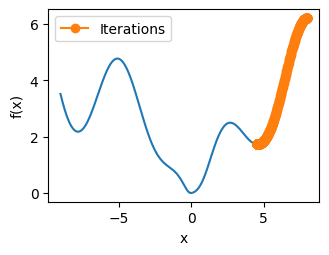

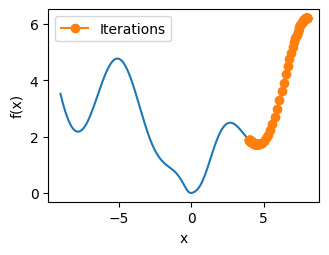

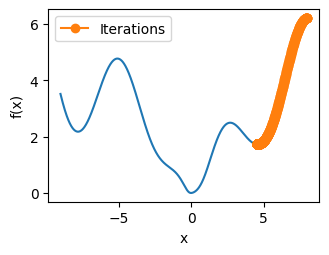

In [31]:
show_trace(history_gd, function1)
show_trace(history_momentum, function1)
show_trace(history_adam, function1)

In [8]:
# Tham số ban đầu
initial_params = [8.0]

# Tạo một thể hiện của lớp Optimizer cho function1
optimizer = Optimizer(initial_params, learning_rate=2, max_epoch=10000, gradf=general_grad, function=function1)

# Áp dụng trình tối ưu hóa GD
history_gd, num_epochs_gd = optimizer.gd()
final_params_gd = history_gd[-1]
print("Tham số Tối ưu hóa Cuối cùng (GD):", final_params_gd)
print("Số Epochs (GD):", num_epochs_gd)

history_bgd, num_epochs_bgd = optimizer.bgd()
final_params_gd = history_bgd[-1]
print("Tham số Tối ưu hóa Cuối cùng (BGD):", final_params_gd)
print("Số Epochs (BGD):", num_epochs_bgd)

# Giả sử bạn đã lưu kết quả trong 'history_mbgd' cho tối ưu hóa MBGD
history_mbgd, num_epochs_mbgd = optimizer.mbgd(batch_size=32)
final_params_gd = history_mbgd[-1]
print("Tham số Tối ưu hóa Cuối cùng (MBGD):", final_params_gd)
print("Số Epochs (MBGD):", num_epochs_mbgd)

# Giả sử bạn đã lưu kết quả trong 'history_sgd' cho tối ưu hóa SGD
history_sgd, num_epochs_sgd = optimizer.sgd()
final_params_gd = history_sgd[-1]
print("Tham số Tối ưu hóa Cuối cùng (SGD):", final_params_gd)
print("Số Epochs (SGD):", num_epochs_sgd)

# Áp dụng trình tối ưu hóa GD với momentum
history_momentum, num_epochs_momentum = optimizer.gd_momentum()
final_params_momentum = history_momentum[-1]
print("Tham số Tối ưu hóa Cuối cùng (Momentum):", final_params_momentum)
print("Số Epochs (Momentum):", num_epochs_momentum)

# Áp dụng trình tối ưu hóa Adagrad
history_adagrad, num_epochs_adagrad = optimizer.adagrad()
final_params_adagrad = history_adagrad[-1]
print("Tham số Tối ưu hóa Cuối cùng (Adagrad):", final_params_adagrad)
print("Số Epochs (Adagrad):", num_epochs_adagrad)

# Áp dụng trình tối ưu hóa RMSPROP
history_rmsprop, num_epochs_rmsprop = optimizer.RMSPROP()
final_params_rmsprop = history_rmsprop[-1]
print("Tham số Tối ưu hóa Cuối cùng (RMSPROP):", final_params_rmsprop)
print("Số Epochs (RMSPROP):", num_epochs_rmsprop)

# Áp dụng trình tối ưu hóa Adam
history_adam, num_epochs_adam = optimizer.adam()
final_params_adam = history_adam[-1]
print("Tham số Tối ưu hóa Cuối cùng (Adam):", final_params_adam)
print("Số Epochs (Adam):", num_epochs_adam)

gd epoch  9999 x:  [5.0106917]
Tham số Tối ưu hóa Cuối cùng (GD): [5.0106917]
Số Epochs (GD): 9999
BGD epoch  9999 x:  [5.0106917]
Tham số Tối ưu hóa Cuối cùng (BGD): [5.0106917]
Số Epochs (BGD): 9999
MBGD epoch  9999 x:  [-1411.36370319]
Tham số Tối ưu hóa Cuối cùng (MBGD): [-1411.36370319]
Số Epochs (MBGD): 9999
SGD epoch  9999 x:  [-1411.36370319]
Tham số Tối ưu hóa Cuối cùng (SGD): [-1411.36370319]
Số Epochs (SGD): 9999
gd_momentum epoch  4198 x:  [4.5661191]
Tham số Tối ưu hóa Cuối cùng (Momentum): [4.5661191]
Số Epochs (Momentum): 4198
adagrad epoch  12 x:  [4.56611898]
Tham số Tối ưu hóa Cuối cùng (Adagrad): [4.56611898]
Số Epochs (Adagrad): 12
RMSPROP epoch  9999 x:  [-1.85845796]
Tham số Tối ưu hóa Cuối cùng (RMSPROP): [-1.85845796]
Số Epochs (RMSPROP): 9999
ADAM: epoch  9999 x:  [-0.05066059]
Tham số Tối ưu hóa Cuối cùng (Adam): [-0.05066059]
Số Epochs (Adam): 9999


# ĐỐI VỚI GRADIENT SAU 14 LẦN CHẠY NÓ TÌM RA ĐIỂM ĐIỂM TỐI ƯU 4.56611898
# ĐỐI VỚI gd_momentum  SAU 337  LẦN CHẠY NÓ TÌM RA ĐIỂM ĐIỂM TỐI ƯU -7.7913011
# TƯƠNG TỰ VỚI CÁC THUẬT TOÁN DƯỚI

# Ở ĐỒ THỊ HÀM SIN NÀY THÌ GRADIENT DESCENT VÀ adagrad CHIẾM BỊ TRÍ THỨ NHẤT HOẶC THỨ 2

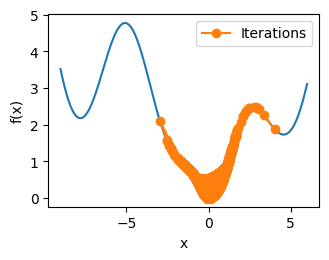

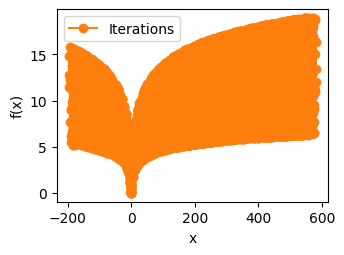

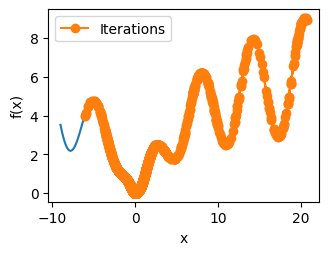

In [21]:
show_trace(history_gd, function1)
show_trace(history_momentum, function1)
show_trace(history_adam, function1)

In [10]:
# ĐỒ THỊ HÀM TAN
def funtion2(theta):
    x = theta[-1]
    return (2 + math.sin(50*x)/50) + (math.atan(x))**2

In [11]:
# Initial parameters
initial_params = [4.03]

# Create an instance of the Optimizer class for function1
optimizer = Optimizer(initial_params, learning_rate=0.06, max_epoch=10000, gradf=general_grad, function=funtion2)

# Apply GD optimizer
history_gd, num_epochs_gd = optimizer.gd()
final_params_gd = history_gd[-1]
print("Final Optimized Parameters (GD):", final_params_gd)
print("Number of Epochs (GD):", num_epochs_gd)

history_bgd, num_epochs_bgd = optimizer.bgd()
final_params_gd = history_bgd[-1]
print("Final Optimized Parameters (bgd):", final_params_gd)
print("Number of Epochs (BGD):", num_epochs_bgd)

# Assume you have results stored in 'history_mbgd' for MBGD optimization
history_mbgd, num_epochs_mbgd = optimizer.mbgd(batch_size=32)
final_params_gd = history_mbgd[-1]
print("Final Optimized Parameters (mbgd):", final_params_gd)
print("Number of Epochs (MBGD):", num_epochs_mbgd)

# Assume you have results stored in 'history_sgd' for SGD optimization
history_sgd, num_epochs_sgd = optimizer.sgd()
final_params_gd = history_sgd[-1]
print("Final Optimized Parameters (sgd):", final_params_gd)
print("Number of Epochs (SGD):", num_epochs_sgd)

# Apply GD with momentum optimizer
history_momentum, num_epochs_momentum = optimizer.gd_momentum()
final_params_momentum = history_momentum[-1]
print("Final Optimized Parameters (Momentum):", final_params_momentum)
print("Number of Epochs (Momentum):", num_epochs_momentum)

# Apply Adagrad optimizer
history_adagrad, num_epochs_adagrad = optimizer.adagrad()
final_params_adagrad = history_adagrad[-1]
print("Final Optimized Parameters (Adagrad):", final_params_adagrad)
print("Number of Epochs (Adagrad):", num_epochs_adagrad)

# Apply RMSPROP optimizer
history_rmsprop, num_epochs_rmsprop = optimizer.RMSPROP()
final_params_rmsprop = history_rmsprop[-1]
print("Final Optimized Parameters (RMSPROP):", final_params_rmsprop)
print("Number of Epochs (RMSPROP):", num_epochs_rmsprop)

# Apply Adam optimizer
history_adam, num_epochs_adam = optimizer.adam()
final_params_adam = history_adam[-1]
print("Final Optimized Parameters (Adam):", final_params_adam)
print("Number of Epochs (Adam):", num_epochs_adam)

gd epoch  9999 x:  [3.99363737]
Final Optimized Parameters (GD): [3.99363737]
Number of Epochs (GD): 9999
BGD epoch  9999 x:  [3.99363737]
Final Optimized Parameters (bgd): [3.99363737]
Number of Epochs (BGD): 9999
MBGD epoch  9999 x:  [-631.70823903]
Final Optimized Parameters (mbgd): [-631.70823903]
Number of Epochs (MBGD): 9999
SGD epoch  9999 x:  [-631.70823903]
Final Optimized Parameters (sgd): [-631.70823903]
Number of Epochs (SGD): 9999
gd_momentum epoch  267 x:  [3.98667174]
Final Optimized Parameters (Momentum): [3.98667174]
Number of Epochs (Momentum): 267
adagrad epoch  49 x:  [3.9866718]
Final Optimized Parameters (Adagrad): [3.9866718]
Number of Epochs (Adagrad): 49
RMSPROP epoch  9999 x:  [-0.05840197]
Final Optimized Parameters (RMSPROP): [-0.05840197]
Number of Epochs (RMSPROP): 9999
ADAM: epoch  261 x:  [3.98667181]
Final Optimized Parameters (Adam): [3.98667181]
Number of Epochs (Adam): 261


In [12]:
# Initial parameters
initial_params = [4.03]

# Create an instance of the Optimizer class for function1
optimizer = Optimizer(initial_params, learning_rate=0.01, max_epoch=10000, gradf=general_grad, function=funtion2)

# Apply GD optimizer
history_gd, num_epochs_gd = optimizer.gd()
final_params_gd = history_gd[-1]
print("Final Optimized Parameters (GD):", final_params_gd)
print("Number of Epochs (GD):", num_epochs_gd)

history_bgd, num_epochs_bgd = optimizer.bgd()
final_params_gd = history_bgd[-1]
print("Final Optimized Parameters (bgd):", final_params_gd)
print("Number of Epochs (BGD):", num_epochs_bgd)

# Assume you have results stored in 'history_mbgd' for MBGD optimization
history_mbgd, num_epochs_mbgd = optimizer.mbgd(batch_size=32)
final_params_gd = history_mbgd[-1]
print("Final Optimized Parameters (mbgd):", final_params_gd)
print("Number of Epochs (MBGD):", num_epochs_mbgd)

# Assume you have results stored in 'history_sgd' for SGD optimization
history_sgd, num_epochs_sgd = optimizer.sgd()
final_params_gd = history_sgd[-1]
print("Final Optimized Parameters (sgd):", final_params_gd)
print("Number of Epochs (SGD):", num_epochs_sgd)

# Apply GD with momentum optimizer
history_momentum, num_epochs_momentum = optimizer.gd_momentum()
final_params_momentum = history_momentum[-1]
print("Final Optimized Parameters (Momentum):", final_params_momentum)
print("Number of Epochs (Momentum):", num_epochs_momentum)

# Apply Adagrad optimizer
history_adagrad, num_epochs_adagrad = optimizer.adagrad()
final_params_adagrad = history_adagrad[-1]
print("Final Optimized Parameters (Adagrad):", final_params_adagrad)
print("Number of Epochs (Adagrad):", num_epochs_adagrad)

# Apply RMSPROP optimizer
history_rmsprop, num_epochs_rmsprop = optimizer.RMSPROP()
final_params_rmsprop = history_rmsprop[-1]
print("Final Optimized Parameters (RMSPROP):", final_params_rmsprop)
print("Number of Epochs (RMSPROP):", num_epochs_rmsprop)

# Apply Adam optimizer
history_adam, num_epochs_adam = optimizer.adam()
final_params_adam = history_adam[-1]
print("Final Optimized Parameters (Adam):", final_params_adam)
print("Number of Epochs (Adam):", num_epochs_adam)

gd epoch  23 x:  [3.9866718]
Final Optimized Parameters (GD): [3.9866718]
Number of Epochs (GD): 23
BGD epoch  23 x:  [3.9866718]
Final Optimized Parameters (bgd): [3.9866718]
Number of Epochs (BGD): 23
MBGD epoch  9999 x:  [-101.92637317]
Final Optimized Parameters (mbgd): [-101.92637317]
Number of Epochs (MBGD): 9999
SGD epoch  9999 x:  [-101.92637317]
Final Optimized Parameters (sgd): [-101.92637317]
Number of Epochs (SGD): 9999
gd_momentum epoch  246 x:  [3.9866717]
Final Optimized Parameters (Momentum): [3.9866717]
Number of Epochs (Momentum): 246
adagrad epoch  61 x:  [3.98667183]
Final Optimized Parameters (Adagrad): [3.98667183]
Number of Epochs (Adagrad): 61
RMSPROP epoch  9999 x:  [3.98156969]
Final Optimized Parameters (RMSPROP): [3.98156969]
Number of Epochs (RMSPROP): 9999
ADAM: epoch  168 x:  [3.98666652]
Final Optimized Parameters (Adam): [3.98666652]
Number of Epochs (Adam): 168


In [13]:
# Initial parameters
initial_params = [4.03]

# Create an instance of the Optimizer class for function1
optimizer = Optimizer(initial_params, learning_rate=1, max_epoch=10000, gradf=general_grad, function=funtion2)

# Apply GD optimizer
history_gd, num_epochs_gd = optimizer.gd()
final_params_gd = history_gd[-1]
print("Final Optimized Parameters (GD):", final_params_gd)
print("Number of Epochs (GD):", num_epochs_gd)

history_bgd, num_epochs_bgd = optimizer.bgd()
final_params_gd = history_bgd[-1]
print("Final Optimized Parameters (bgd):", final_params_gd)
print("Number of Epochs (BGD):", num_epochs_bgd)

# Assume you have results stored in 'history_mbgd' for MBGD optimization
history_mbgd, num_epochs_mbgd = optimizer.mbgd(batch_size=32)
final_params_gd = history_mbgd[-1]
print("Final Optimized Parameters (mbgd):", final_params_gd)
print("Number of Epochs (MBGD):", num_epochs_mbgd)

# Assume you have results stored in 'history_sgd' for SGD optimization
history_sgd, num_epochs_sgd = optimizer.sgd()
final_params_gd = history_sgd[-1]
print("Final Optimized Parameters (sgd):", final_params_gd)
print("Number of Epochs (SGD):", num_epochs_sgd)

# Apply GD with momentum optimizer
history_momentum, num_epochs_momentum = optimizer.gd_momentum()
final_params_momentum = history_momentum[-1]
print("Final Optimized Parameters (Momentum):", final_params_momentum)
print("Number of Epochs (Momentum):", num_epochs_momentum)

# Apply Adagrad optimizer
history_adagrad, num_epochs_adagrad = optimizer.adagrad()
final_params_adagrad = history_adagrad[-1]
print("Final Optimized Parameters (Adagrad):", final_params_adagrad)
print("Number of Epochs (Adagrad):", num_epochs_adagrad)

# Apply RMSPROP optimizer
history_rmsprop, num_epochs_rmsprop = optimizer.RMSPROP()
final_params_rmsprop = history_rmsprop[-1]
print("Final Optimized Parameters (RMSPROP):", final_params_rmsprop)
print("Number of Epochs (RMSPROP):", num_epochs_rmsprop)

# Apply Adam optimizer
history_adam, num_epochs_adam = optimizer.adam()
final_params_adam = history_adam[-1]
print("Final Optimized Parameters (Adam):", final_params_adam)
print("Number of Epochs (Adam):", num_epochs_adam)

gd epoch  9999 x:  [-0.13295658]
Final Optimized Parameters (GD): [-0.13295658]
Number of Epochs (GD): 9999
BGD epoch  9999 x:  [-0.13295658]
Final Optimized Parameters (bgd): [-0.13295658]
Number of Epochs (BGD): 9999
MBGD epoch  9999 x:  [-10591.60731716]
Final Optimized Parameters (mbgd): [-10591.60731716]
Number of Epochs (MBGD): 9999
SGD epoch  9999 x:  [-10591.60731716]
Final Optimized Parameters (sgd): [-10591.60731716]
Number of Epochs (SGD): 9999
gd_momentum epoch  9999 x:  [140.58435864]
Final Optimized Parameters (Momentum): [140.58435864]
Number of Epochs (Momentum): 9999
adagrad epoch  6848 x:  [-0.03020883]
Final Optimized Parameters (Adagrad): [-0.03020883]
Number of Epochs (Adagrad): 6848
RMSPROP epoch  9999 x:  [0.30484974]
Final Optimized Parameters (RMSPROP): [0.30484974]
Number of Epochs (RMSPROP): 9999
ADAM: epoch  9999 x:  [-0.20488129]
Final Optimized Parameters (Adam): [-0.20488129]
Number of Epochs (Adam): 9999


# Ở MỖI ĐỒ THỊ KHÁC NHAU VÀ LEARNING RATE KHÁC NHAU THÌ CHO RA TỐC ĐỘ TÌM THẤY ĐIỂM TÌM THẤY TỐI ƯU HÓA KHÁC NHAU
# NHÌN CHUNG THÌ CẢ 3 LẦN CHẠY TRÊN ADAM KHÔNG TỐN NHIỀU BƯỚC QUÁ NẰM TRONG KHOẢNG TỪ (200-400) SẼ TÌM RA ĐIỂM TỐI ƯU HÓA

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def show_trace(res, function):
    res1 = [item[0] for item in res]
    n = max(abs(min(res1)), abs(max(res1)))
    f_line = np.arange(-9, 6, 0.01)
    
    plt.figure(figsize=(3.5, 2.5))
    plt.plot(f_line, [function([x]) for x in f_line], '-')
    plt.plot(res1, [function(x) for x in res], 'o-', label='Iterations')
    
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.show()

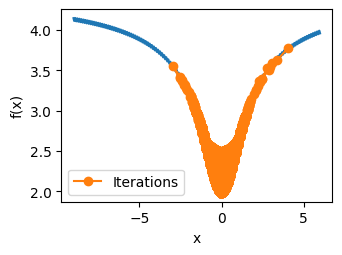

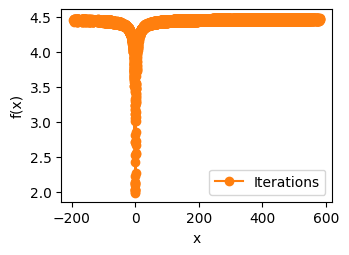

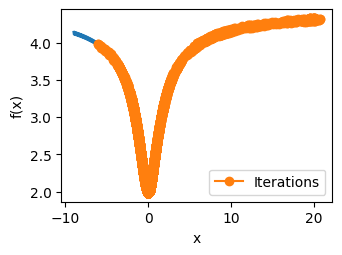

In [20]:
show_trace(history_gd, funtion2)
show_trace(history_momentum, funtion2)
show_trace(history_adam, funtion2)